**Importing Libraries**

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Data into Pandas DataFrame**

In [3]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\worldometer_snapshots_April18_to_May18.txt")

In [4]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


**Checking Data Shape**

In [5]:
print(df.shape)

(6603, 9)


**Checking Data Types**

In [6]:
df.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

**Checking and Dealing with Missing Data** 

In [7]:
missing_data = df.isnull()
missing_data.head(15)

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [8]:
df.dropna( axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

**Checking And Fixing Skewnness**

In [9]:
df.skew(axis=0,skipna=True)

Population             3.114406
Total Tests            7.163919
Total Cases            9.144735
Total Deaths           7.241007
Total Recovered        5.553082
Serious or Critical    6.756066
Active Cases           9.985893
dtype: float64

In [10]:
Total_Tests_log = np.log(df['Total Tests'])
Total_Tests_log.skew()

-0.5536649496348182

In [11]:
Total_Cases_log = np.log(df['Total Cases'])
Total_Cases_log.skew()

0.043961372403283336

**Corelation**

In [12]:
df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.571506,0.610035,0.542677,0.512286,0.663715,0.599638
Total Tests,0.571506,1.000000,0.901143,0.822011,0.821648,0.745462,0.861574
Total Cases,0.610035,0.901143,1.000000,0.945894,0.834441,0.893691,0.979611
Total Deaths,0.542677,0.822011,0.945894,1.000000,0.849554,0.852833,0.896553
Total Recovered,0.512286,0.821648,0.834441,0.849554,1.000000,0.740360,0.707767
Serious or Critical,0.663715,0.745462,0.893691,0.852833,0.740360,1.000000,0.876725
Active Cases,0.599638,0.861574,0.979611,0.896553,0.707767,0.876725,1.000000


**Visualzations**

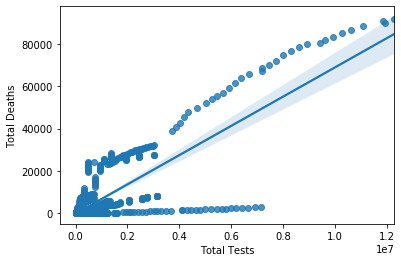

In [14]:
sns.regplot(x="Total Tests", y="Total Deaths", data=df)

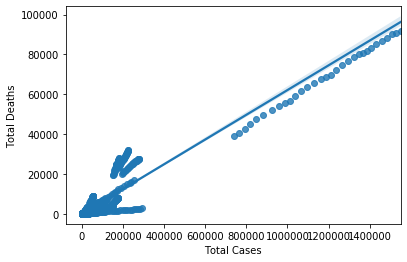

In [17]:
sns.regplot(x="Total Cases", y="Total Deaths", data=df)

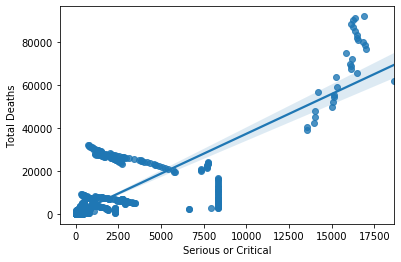

In [18]:
sns.regplot(x="Serious or Critical", y="Total Deaths", data=df)

**Defining Data and Deviding into Training and Test sets**

In [13]:
y_data = df['Total Deaths']
x_data = df[['Total Tests','Total Cases','Serious or Critical']]

In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 352
number of training samples: 3162


**Building,Fitting and evaluation of different Models**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lre=LinearRegression()

In [17]:
lre.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lre.score(x_test,y_test)

0.8824044623790869

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [20]:
poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.00000000e+00, 1.36518000e+05, 1.10360000e+04, ...,
        6.78339941e+12, 1.45060009e+11, 3.10204442e+09],
       [1.00000000e+00, 5.20000000e+03, 1.31200000e+03, ...,
        1.39428864e+08, 9.56448000e+05, 6.56100000e+03],
       [1.00000000e+00, 7.72781100e+06, 1.23763300e+06, ...,
        4.00947132e+20, 5.24139519e+18, 6.85183191e+16],
       ...,
       [1.00000000e+00, 2.90300000e+03, 3.08000000e+02, ...,
        4.59141760e+07, 3.27958400e+06, 2.34256000e+05],
       [1.00000000e+00, 3.24530000e+04, 1.01280000e+04, ...,
        1.57721448e+12, 1.93102879e+10, 2.36421376e+08],
       [1.00000000e+00, 2.68220000e+04, 1.56500000e+03, ...,
        3.91876000e+07, 1.00160000e+05, 2.56000000e+02]])

In [21]:
plre = linear_model.LinearRegression()
plre.fit(train_x_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
plre.fit(x_test, y_test)
print('The R-square is: ', plre.score(x_test, y_test))

The R-square is:  0.8864196159036867


**Checking Overfitting or Underfitting**

In [26]:
from scipy.stats import norm

In [36]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction,  color="r", label=RedName,kde = False)
    ax2 = sns.distplot(BlueFunction,  color="b", label=BlueName, ax=ax1,kde = False)

    plt.title(Title)
    plt.show()
    plt.close()

In [38]:
yhat_train = lre.predict(x_train)
yhat_train[0:5]


array([  815.63836863,   304.28231669, 78064.84111763,   217.8634402 ,
         280.27274666])

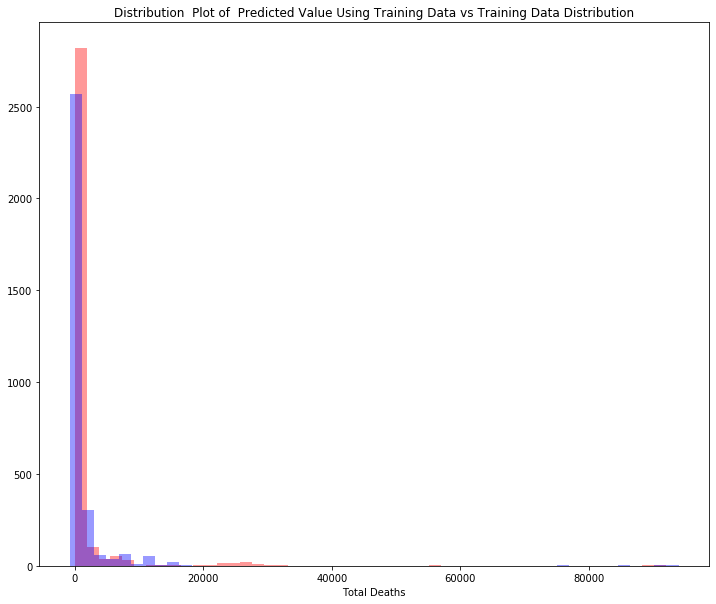

In [39]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [25]:
yhat_test = lre.predict(x_test)
yhat_test[0:5]

array([ 598.99696389,  712.2397239 ,  211.35302617, -415.18552447,
        222.5480425 ])

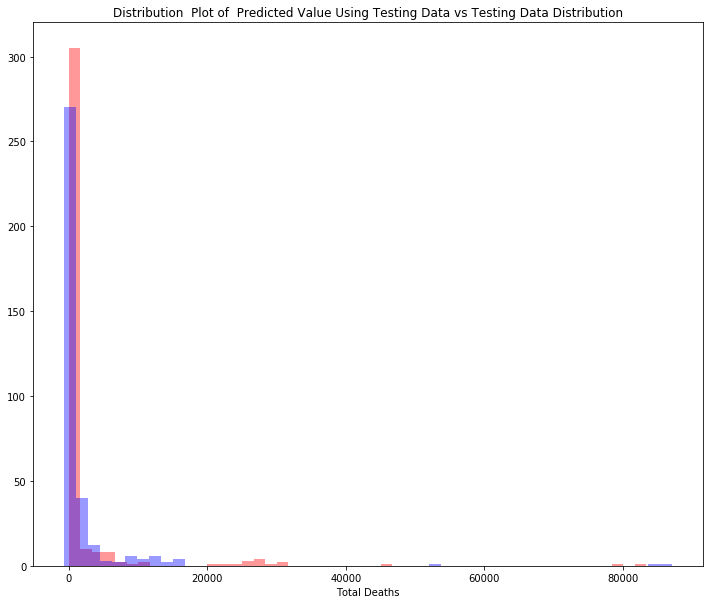

In [40]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)